In [2]:
from __future__ import annotations

from importlib import resources

import numpy as np

%matplotlib widget
from IPython.display import display
from matplotlib import pyplot as plt

# loading of the matplotlib config
with resources.as_file(resources.files("config") / "generic.mplstyle") as mplpath:
    plt.style.use(mplpath)

## Single neuron receiving external inputs

In [5]:
# Initialization of the numpy rng
rng = np.random.default_rng(seed=42)

# Integration of the dynamics
delta_t = 0.1  # in ms
tau_m = 20.0

sigma_ext = 1.0
mu_ext = 25.0

# parameters of the LIF
v_thr = 20.0
v_reset = 10.0

# Initialization of the potential
v_m = rng.normal(loc=0, scale=5.0)

# integration of the dynamics
t_range = np.arange(0, 1000, delta_t)

# array that will store the spikes
raster = np.zeros(t_range.size, dtype=bool)

v_ex = np.zeros_like(t_range)
for i_ti, _ti in enumerate(t_range):
    v_ext = rng.normal(
        loc=mu_ext * delta_t / tau_m,
        scale=sigma_ext * np.sqrt(delta_t / tau_m),
    )
    v_m += -v_m / tau_m * delta_t + v_ext
    spikes_t = v_m > v_thr
    raster[i_ti] = spikes_t
    if spikes_t:
        v_m = v_reset
    v_ex[i_ti] = v_m

(900.0, 1000.0)

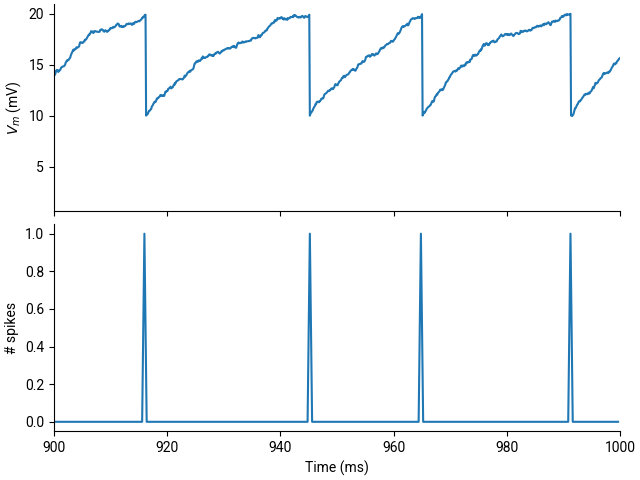

In [7]:
# plotting

# membrane potential trace
fig, ax = plt.subplots(2, sharex=True)
ax[0].plot(t_range, v_ex)
ax[0].set_xlim(900, 1000)
ax[0].set_ylabel("$V_m$ (mV)")

ax[1].plot(t_range[::4], np.sum(raster.reshape((-1, 4)), axis=-1))
ax[1].set_xlabel("Time (ms)")
ax[1].set_ylabel("# spikes")
ax[1].set_xlim(900, 1000)

## Inhibitory network dynamics

In [8]:
# Total number of neurons
n_neur = 5000
# connectivity
c_neur = 1000

c_mat = np.vstack([rng.permutation(n_neur - 1) for _i in np.arange(n_neur)])
neur_inds = np.arange(n_neur).reshape((-1, 1))
c_mat += neur_inds + 1
c_mat = np.mod(c_mat, n_neur)
c_mat_cp = np.sort(c_mat, axis=-1)

c_mat = c_mat[:, :c_neur]
c_mat = np.sort(c_mat, axis=-1)

display(c_mat)

array([[   3,   12,   16, ..., 4981, 4983, 4995],
       [   2,    9,   14, ..., 4992, 4994, 4996],
       [   1,    4,    6, ..., 4983, 4984, 4986],
       ...,
       [   0,    5,    7, ..., 4989, 4998, 4999],
       [   0,   10,   16, ..., 4983, 4984, 4987],
       [   4,    6,   10, ..., 4994, 4995, 4997]])

In [10]:
# Integration of the dynamics
delay = 2.0  # in ms
j_connect = -0.1
sigma_ext = 2.5

v_m = rng.normal(loc=0, scale=5.0, size=n_neur)

# array that will store the spikes
delta_ind = int(delay / delta_t)
raster = np.zeros((t_range.size + delta_ind, n_neur), dtype=bool)

v_ex = np.zeros_like(t_range)
for i_ti, _ti in enumerate(t_range):
    v_in = rng.normal(
        loc=mu_ext * delta_t / tau_m,
        scale=sigma_ext * np.sqrt(delta_t / tau_m),
        size=n_neur,
    )
    spikes_delay = raster[i_ti]
    input_intra = np.sum(spikes_delay[c_mat], axis=-1)
    v_m += -v_m / tau_m * delta_t + v_in + j_connect * input_intra
    spikes_t = v_m > v_thr
    raster[i_ti + delta_ind] = spikes_t
    v_m[spikes_t] = v_reset
    v_ex[i_ti] = v_m[0]

Text(0, 0.5, '# spikes')

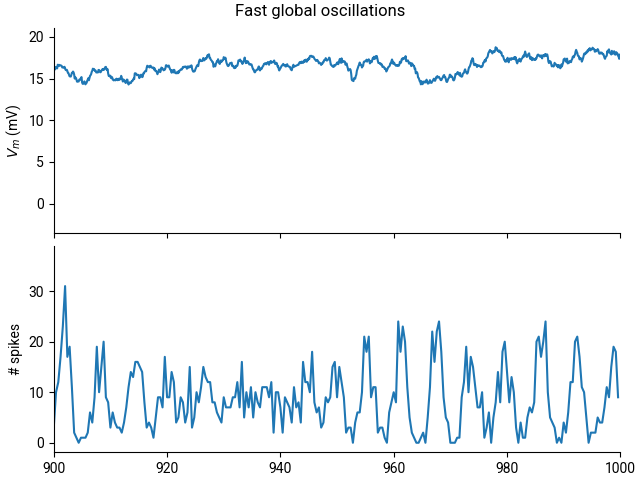

In [14]:
# plotting

# membrane potential trace
fig, ax = plt.subplots(2, sharex=True)
fig.suptitle("Fast global oscillations")
ax[0].plot(t_range, v_ex)
ax[0].set_xlim(900, 1000)
ax[0].set_ylabel("$V_m$ (mV)")


lfp = np.sum(raster, axis=-1)
ax[1].plot(t_range[::4], np.sum(lfp[delta_ind:].reshape((-1, 4)), axis=-1))
ax[1].set_ylabel("# spikes")

In [46]:
plt.close()